In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

### Loading the Dataset

In [ ]:
df = pd.read_csv('heart_disease_health_indicators_BRFSS2015.csv')
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


### Looking into the dataset

In [ ]:
df.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
# checking if there is any empty column in the dataset
df.isnull().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [ ]:
df.shape

(253680, 22)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

### Exploratory Data Analysis.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5cd37f5210>,
      dtype=object)

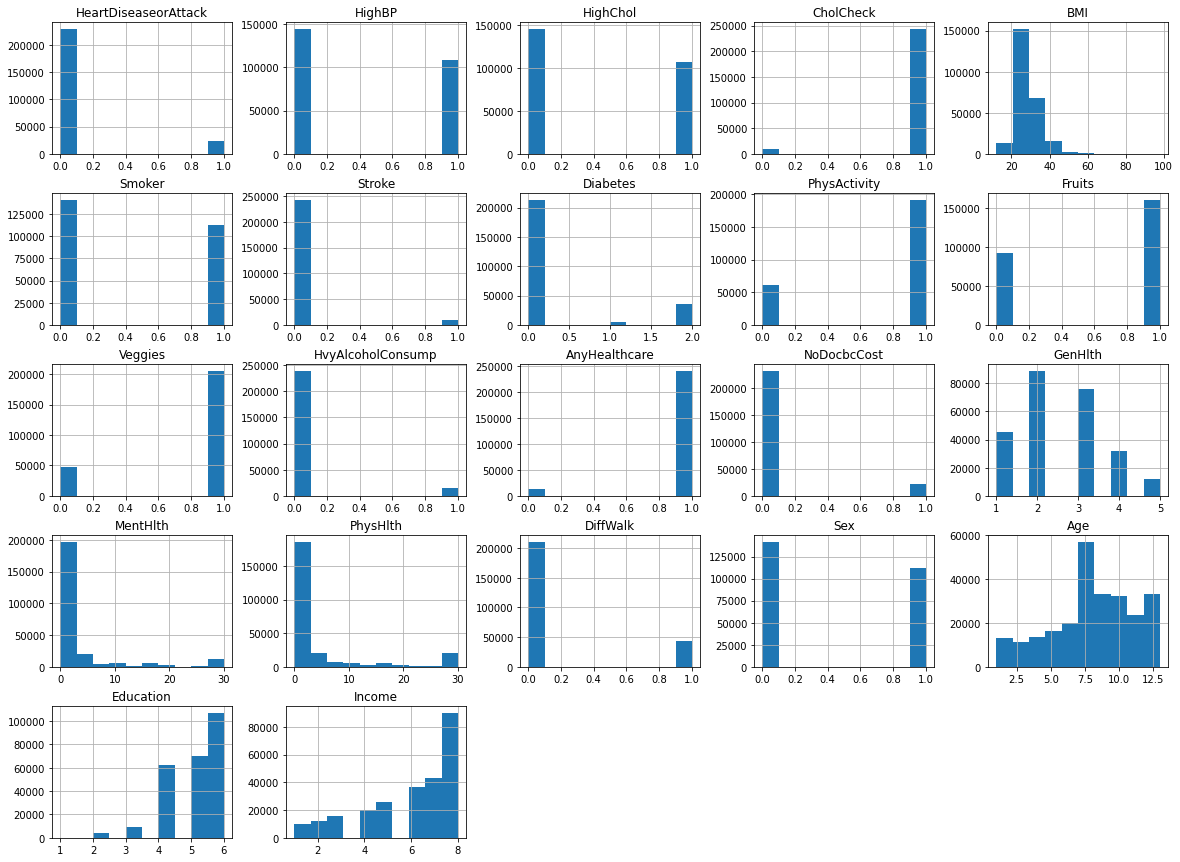

In [ ]:
# Visualizing the dataset 

df.hist(figsize=(20, 15))

In [ ]:
# Looking at how much the dataset features are correlating with the target variable which is the HeartDiseaseorAttack
corr = df.corr()
corr['HeartDiseaseorAttack'].sort_values(ascending=False)

HeartDiseaseorAttack    1.000000
GenHlth                 0.258383
Age                     0.221618
DiffWalk                0.212709
HighBP                  0.209361
Stroke                  0.203002
PhysHlth                0.181698
HighChol                0.180765
Diabetes                0.180272
Smoker                  0.114441
Sex                     0.086096
MentHlth                0.064621
BMI                     0.052904
CholCheck               0.044206
NoDocbcCost             0.031000
AnyHealthcare           0.018734
Fruits                 -0.019790
HvyAlcoholConsump      -0.028991
Veggies                -0.039167
PhysActivity           -0.087299
Education              -0.099600
Income                 -0.141011
Name: HeartDiseaseorAttack, dtype: float64

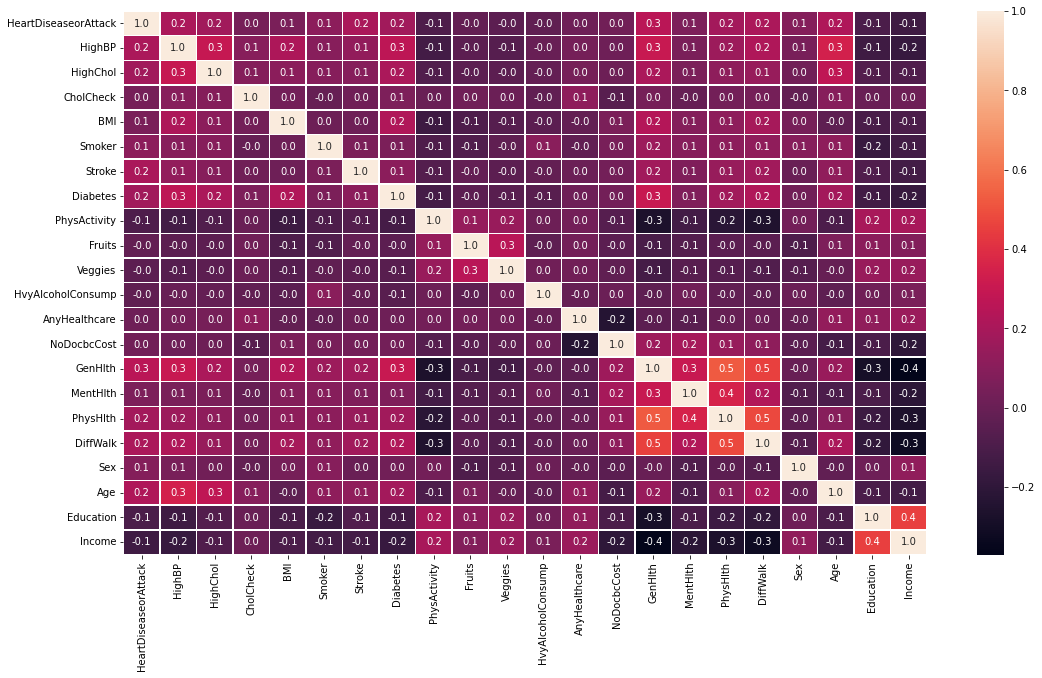

In [ ]:
# plotting a heatmap for the correlation matrix

f,ax = plt.subplots(figsize=(18, 10))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

### Visualizing some of the data.

#### Doing some comparison with HeartDiseaseorAttack

In [ ]:
# selecting the categorical features of the dataset.

catcol = ['HighBP', 'HighChol', 'CholCheck',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'DiffWalk', 'Sex', 'Education',
       'Income']


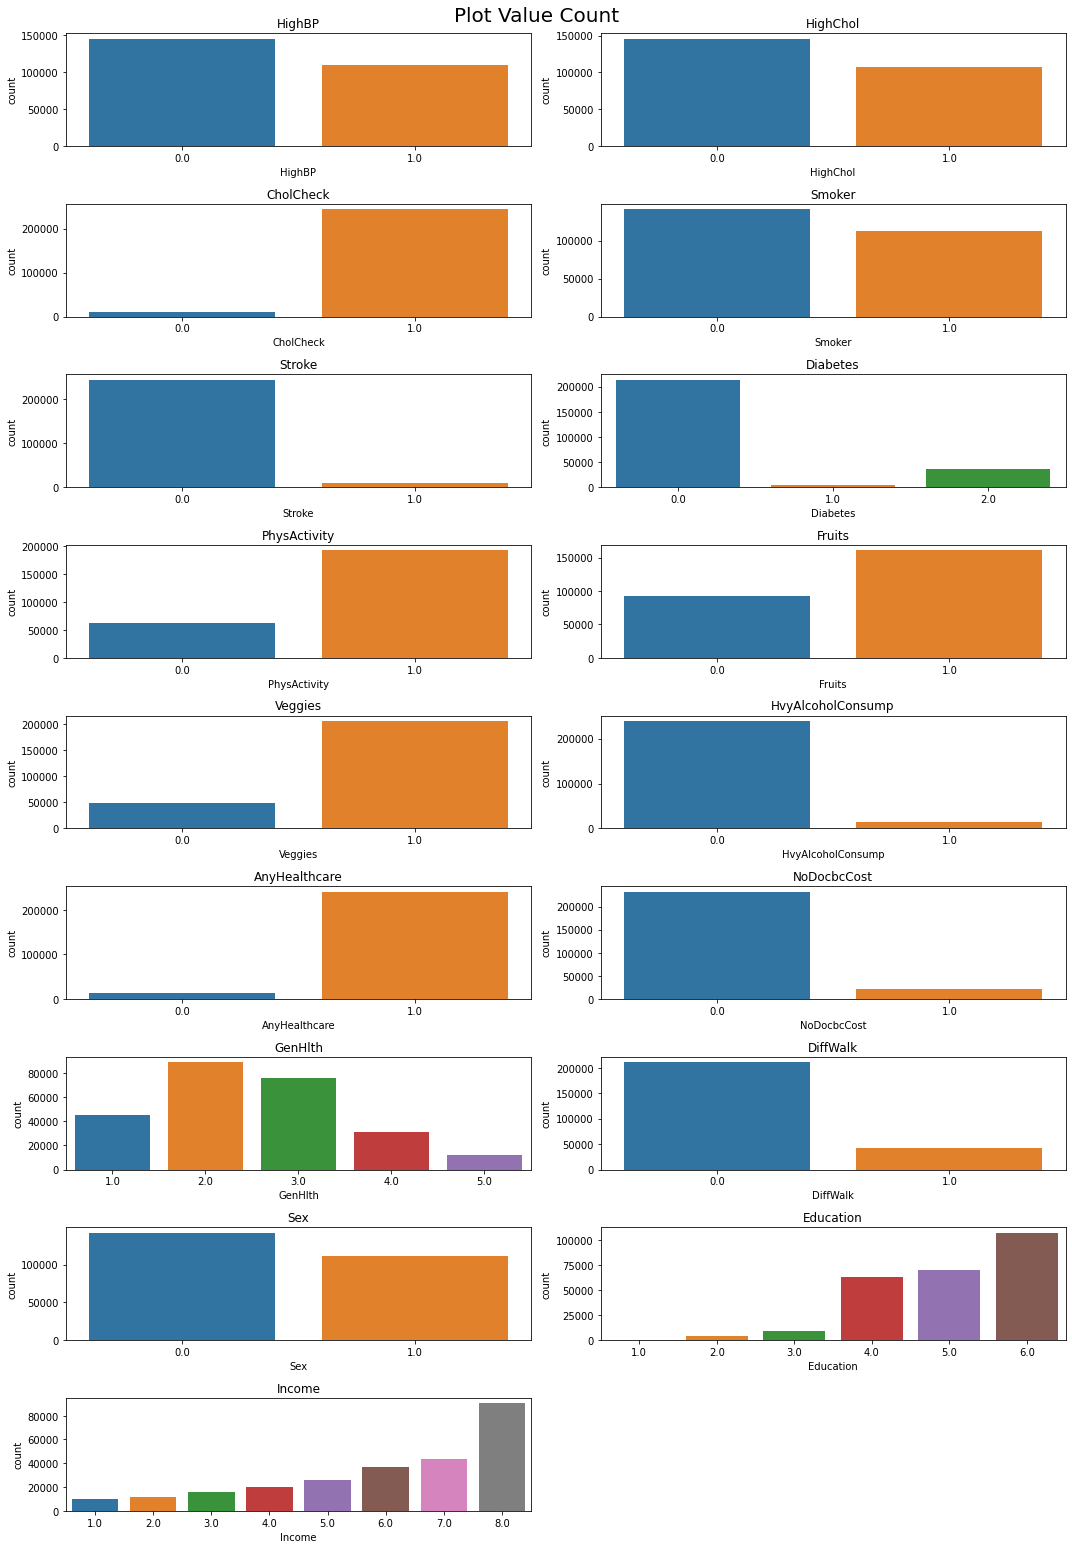

In [ ]:
plt.figure(figsize=(15,40))
for i,column in enumerate(catcol):
    plt.subplot(len(catcol), 2, i+1)
    plt.suptitle("Plot Value Count", fontsize=20, x=0.5, y=1)
    sns.countplot(data=df, x=column)
    plt.title(f"{column}")
    plt.tight_layout()

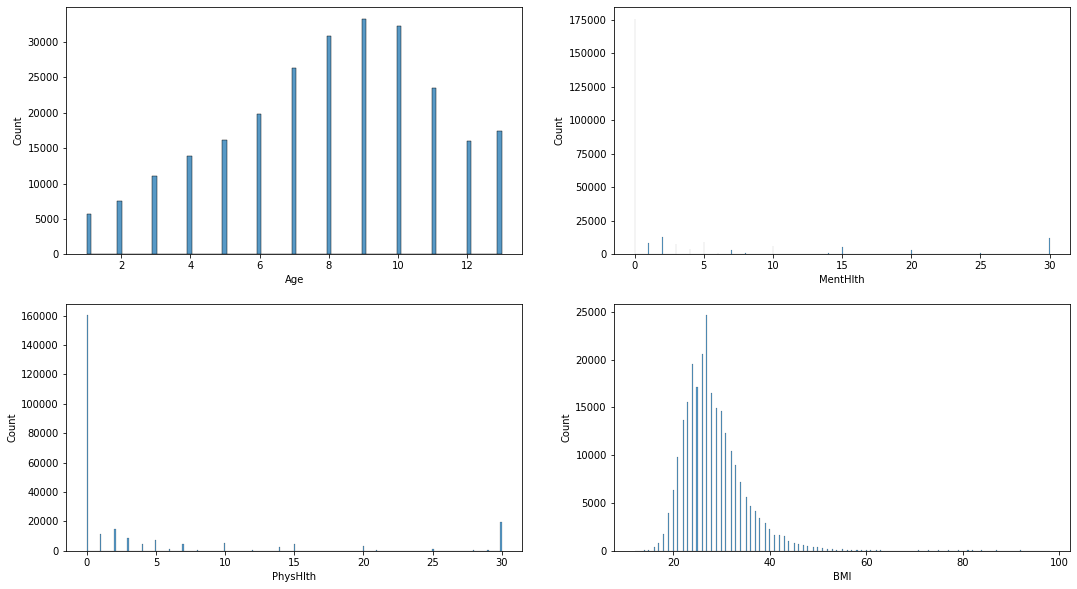

In [ ]:
# for the numerical columns, that is, the part that isn't based on 0 and 1.

distcol = ['Age', 'MentHlth', 'PhysHlth', 'BMI']
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
sns.histplot(ax=axes[0,0], data=df, x=distcol[0])
sns.histplot(ax=axes[0,1], data=df, x=distcol[1])
sns.histplot(ax=axes[1,0], data=df, x=distcol[2])
sns.histplot(ax=axes[1,1], data=df, x=distcol[3])

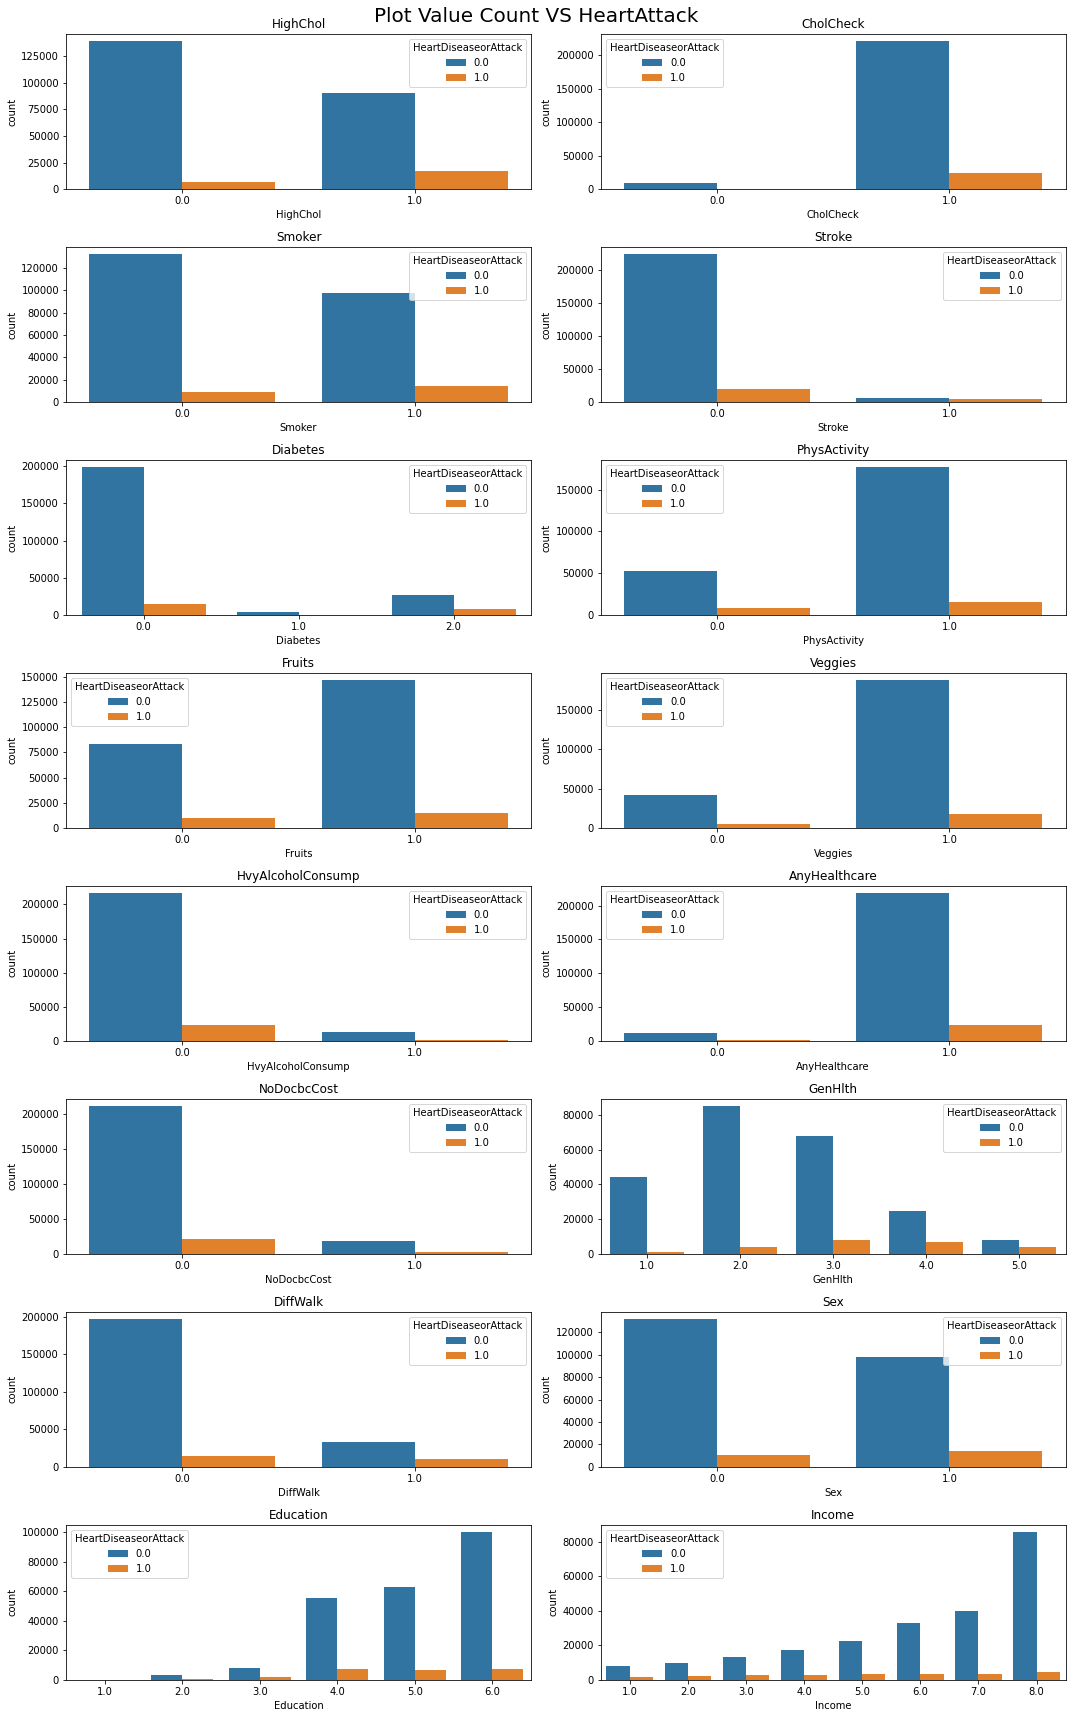

In [ ]:
# plotting features with the target

plt.figure(figsize=(15,50))
for i,column in enumerate(catcol[1:]):
    plt.subplot(len(catcol), 2, i+1)
    plt.suptitle("Plot Value Count VS HeartAttack", fontsize=20, x=0.5, y=1)
    sns.countplot(data=df, x=column, hue='HeartDiseaseorAttack')
    plt.title(f"{column}")
    plt.tight_layout()

### Feature Extraction

looking for and extracting the important features from the features of the dataset.

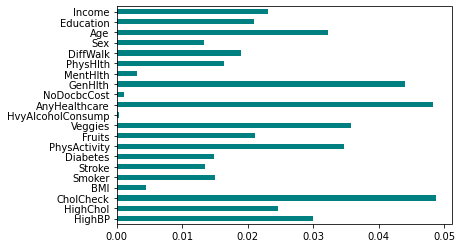

In [ ]:
# Using sklearn function called mutual_info_classif

from sklearn.feature_selection import mutual_info_classif

target = df['HeartDiseaseorAttack']
features = df.drop('HeartDiseaseorAttack',  axis=1)

importance = mutual_info_classif(features, target)
feat_importance = pd.Series(importance, features.columns[0:len(df.columns)-1])
feat_importance.plot(kind='barh', color='teal')
plt.show()

In [ ]:
# performing feature extraction using another method. In this case using sklearn SelectKBest function with mutual_info_classif

from sklearn.feature_selection import SelectKBest
# Another method
# Selecting the 10 most important features in the features .

sel_mutual = SelectKBest(mutual_info_classif, k=10)
feat_mutual = sel_mutual.fit_transform(features, target)
print(sel_mutual.get_support())

[ True  True  True False False False False  True False  True False  True
 False  True False False False False  True  True  True]


In [ ]:
# The important features are as follow.
imp_features = ['HighBP', 'HighChol', 'CholCheck', 'PhysActivity', 'Veggies', 'AnyHealthcare', 'GenHlth', 'Sex', "Education", 'Income']
# extracting the features from the dataset
sel_features = features[imp_features]
sel_features

,HighBP,HighChol,CholCheck,PhysActivity,Veggies,AnyHealthcare,GenHlth,Sex,Education,Income
0,1.0,1.0,1.0,0.0,1.0,1.0,5.0,0.0,4.0,3.0
1,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,6.0,1.0
2,1.0,1.0,1.0,0.0,0.0,1.0,5.0,0.0,4.0,8.0
3,1.0,0.0,1.0,1.0,1.0,1.0,2.0,0.0,3.0,6.0
4,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...
253675,1.0,1.0,1.0,0.0,1.0,1.0,3.0,1.0,6.0,7.0
253676,1.0,1.0,1.0,0.0,0.0,1.0,4.0,0.0,2.0,4.0
253677,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,5.0,2.0
253678,1.0,0.0,1.0,0.0,1.0,1.0,3.0,1.0,5.0,1.0


Looking at the results we have, we can say that both feature selecting process gave us the same features as the important features we need to take note of.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5ccc86d1d0>,
      dtype=object)

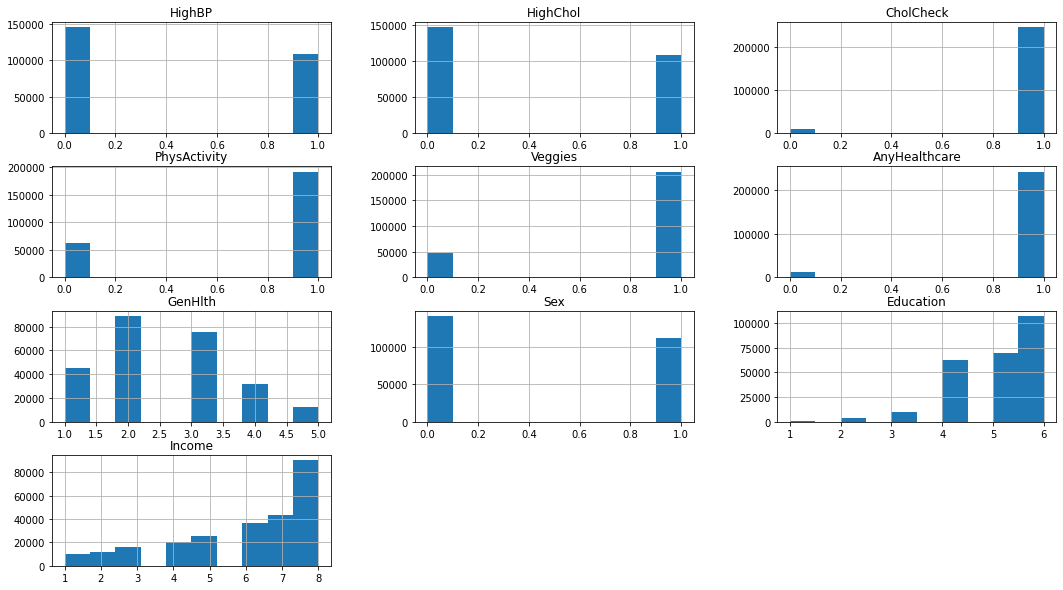

In [ ]:
# Showing plots of the features that are extracted.
sel_features.hist(figsize=(18, 10))

### Preprocessing the data.

In [ ]:
# Using sklearn standard scaler function.
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
# transform the selected features.
scaled_features = scaler.fit_transform(sel_features)
scaled_features

array([[ 1.15368814,  1.16525449,  0.19692156, ..., -0.88702088,
        -1.06559465, -1.4744874 ],
       [-0.86678537, -0.85818163, -5.07816412, ..., -0.88702088,
         0.96327159, -2.44013754],
       [ 1.15368814,  1.16525449,  0.19692156, ..., -0.88702088,
        -1.06559465,  0.93963796],
       ...,
       [-0.86678537, -0.85818163,  0.19692156, ..., -0.88702088,
        -0.05116153, -1.95731247],
       [ 1.15368814, -0.85818163,  0.19692156, ...,  1.12736918,
        -0.05116153, -2.44013754],
       [ 1.15368814,  1.16525449,  0.19692156, ..., -0.88702088,
         0.96327159, -1.95731247]])

In [ ]:
# splitting the dataset into train and test set.
# 80% for training and 20% for testing
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(scaled_features, test_size=0.2, random_state=42)
train_target, test_target = train_test_split(target, test_size=0.2, random_state=42)
train_data.shape, test_data.shape, train_target.shape, test_target.shape

((202944, 10), (50736, 10), (202944,), (50736,))

### Now applying MLP for the classification

In [ ]:
# Here, keras is used to implement Multi-Layer Perceptron. 
# Using the 'relu' activation function, an input neuron of 64, a hidden layer with neuron of a size of 32, and an output of a of 1 neuron.
# sigmoid function is used for the output, since it's values is between 0 and 1. It is a classification dataset.
# the optimizer used is sgd (Stochastic gradient descent) for optimizing .
# loss used is the BinaryCrossEntropy
# Uisng the accuracy metric to check the performance of the model when validating.

import tensorflow as tf
from tensorflow import keras
from keras import layers

# MLP model -- using keras sequential model.

model = keras.Sequential([
    layers.Dense(64, input_shape=[10], activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model.compile(
    optimizer='sgd',
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=['accuracy'],
)
history = model.fit(
    train_data, train_target,
    validation_data=[test_data, test_target],
    batch_size=256,
    epochs=50
)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


793/793 [==============================] - 4s 3ms/step - loss: 0.3089 - accuracy: 0.9022 - val_loss: 0.2669 - val_accuracy: 0.9060
Epoch 2/50
793/793 [==============================] - 2s 3ms/step - loss: 0.2647 - accuracy: 0.9058 - val_loss: 0.2608 - val_accuracy: 0.9060
Epoch 3/50
793/793 [==============================] - 3s 3ms/step - loss: 0.2611 - accuracy: 0.9058 - val_loss: 0.2592 - val_accuracy: 0.9060
Epoch 4/50
793/793 [==============================] - 3s 3ms/step - loss: 0.2600 - accuracy: 0.9058 - val_loss: 0.2586 - val_accuracy: 0.9060
Epoch 5/50
793/793 [==============================] - 3s 3ms/step - loss: 0.2594 - accuracy: 0.9058 - val_loss: 0.2582 - val_accuracy: 0.9060
Epoch 6/50
793/793 [==============================] - 2s 3ms/step - loss: 0.2590 - accuracy: 0.9058 - val_loss: 0.2580 - val_accuracy: 0.9060
Epoch 7/50
793/793 [==============================] - 3s 3ms/step - loss: 0.2587 - accuracy: 0.9058 - val_loss: 0.2578 - val_accuracy: 0.9060
Epoch 8/50
793/79

In [ ]:
# looking at the model summary.

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                704       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,817
Trainable params: 2,817
Non-trainable params: 0
_________________________________________________________________


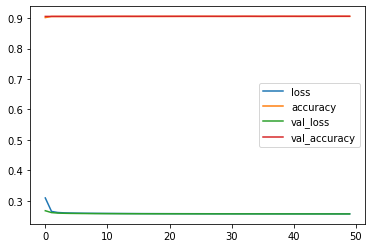

In [ ]:
# plotting a graph showing the correlation between the training loss and it's accuracy, and the validation loss and it's accuracy.

histories = []
histories.append(history)
pd.DataFrame(histories[0].history).plot()

It is observed that they both have about the same result.

### Now using sklearn MLP library to compare the accuracy with the performance of keras MLP.

In [ ]:
# importing the neural network
# This neural network implements back propagation, sgd and other neural network properties.

from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier(random_state=1, max_iter=300)
classifier.fit(train_data, train_target)

# predicting the test data with the model
prediction = classifier.predict(test_data)


In [ ]:
# testing the accuracy
classifier.score(test_data, test_target)

0.9062401450646483

Looking at this result, we will see that they have almost the same result.